In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
del df['User ID']
del df['Gender']

In [5]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
X =df.loc[:,['Age','EstimatedSalary']].values
Y =df['Purchased'].values

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [10]:
Y_pred=log.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [11]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(Y_test,Y_pred)

In [12]:
mat

array([[31,  1],
       [ 1,  7]], dtype=int64)

In [13]:
TP=mat[0,0]
print('TP IS :',TP)

TP IS : 31


In [14]:
FP=mat[0,1]
print('FP IS :',FP)

FP IS : 1


In [15]:
TN=mat[1,0]
print('TN IS :',TN)

TN IS : 1


In [16]:
FN=mat[1,1]
print('FN IS :',FN)

FN IS : 7


In [17]:
acc=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy is :',acc)

Accuracy is : 0.8


In [18]:
error_rate=(FP+FN)/(TP+TN+FP+FN)
print('Error rate is :',error_rate)

Error rate is : 0.2


In [19]:
precision=TP/(TP+FP)
print('Precision is: ',precision)

Precision is:  0.96875


In [20]:
recall=TP/(TP+FN)
print('Recall is: ',recall)

Recall is:  0.8157894736842105


<AxesSubplot:xlabel='Age'>

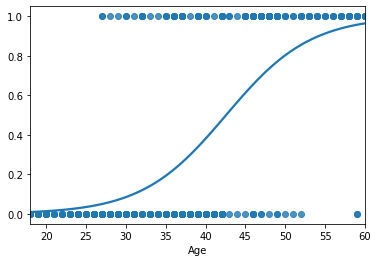

In [21]:
import seaborn as sns
sns.regplot(x=df['Age'],y=Y,logistic=True,ci=None)

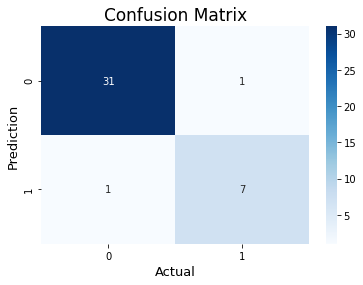

In [22]:
sns.heatmap(mat,annot=True,cmap="Blues")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()